In [1]:
!pip install --quiet gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 30.5 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np

In [5]:
class Agent():
    # Initialize Q-table with zeros
    def __init__(self, lr, gamma, n_actions, n_states, eps_start, eps_end,
                 eps_dec):
        self.lr = lr
        self.gamma = gamma
        self.n_actions = n_actions
        self.n_states = n_states
        self.epsilon = eps_start
        self.eps_min = eps_end
        self.eps_dec = eps_dec

        self.Q = {}

        self.init_Q()

    # Initialize Q-table with zeros
    def init_Q(self):
        for state in range(self.n_states):
            for action in range(self.n_actions):
                self.Q[(state, action)] = 0.0

    # Choose an action based on epsilon greedy
    # if epsilon is greater than a random number, it will do a random action.
    # A greater epsilon will create more random actions
    def choose_action(self, state):
        if np.random.random() < self.epsilon:
            action = np.random.choice([i for i in range(self.n_actions)])
        else:
            actions = np.array([self.Q[(state, a)] \
                                for a in range(self.n_actions)])
            action = np.argmax(actions)
        return action

    # Linearly decrease epsilon. It's possible to decrease in other ways, like logarithm or exponential
    def decrement_epsilon(self):
        self.epsilon = self.epsilon*self.eps_dec if self.epsilon>self.eps_min\
                       else self.eps_min

    def learn(self, state, action, reward, state_):
        actions = np.array([self.Q[(state_, a)] for a in range(self.n_actions)])
        a_max = np.argmax(actions)

        # Update equation for Q. We're incrementing it by learning_rate, multiplied by reward, 
        # plus gamma, times the new value for the next state to maximal action,
        # and subtracting off the value for the current state and action
        self.Q[(state, action)] += self.lr*(reward +
                                        self.gamma*self.Q[(state_, a_max)] -
                                        self.Q[(state, action)])
        self.decrement_epsilon()

 Episode: 499000, win pct: 0.2, epsilon: 0.01

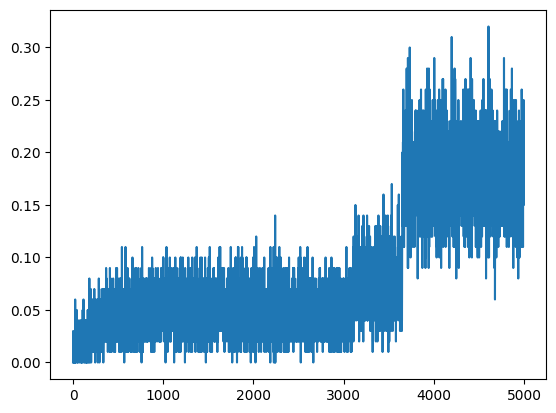

In [6]:
env = gym.make('FrozenLake-v1')
agent = Agent(lr=0.001, gamma=0.9, eps_start=1.0, eps_end=0.01,
              eps_dec=0.9999995, n_actions=4, n_states=16)

scores = []
win_pct_list = []
n_games = 500000

for i in range(n_games):
  done = False
  truncated = False

  observation = env.reset()[0]
  score = 0

  while not done or not truncated:
    action = agent.choose_action(observation)
    observation_, reward, done, truncated, info = env.step(action)
    agent.learn(observation, action, reward, observation_)
    score += reward
    observation = observation_

  scores.append(score)
  if i % 100 == 0:
    win_pct = np.mean(scores[-100:])
    win_pct_list.append(win_pct)

    if i % 1000 == 0:
      print(f'\r Episode: {i}, win pct: {win_pct}, epsilon: {agent.epsilon}', end='', flush=True)

plt.plot(win_pct_list)
plt.show()

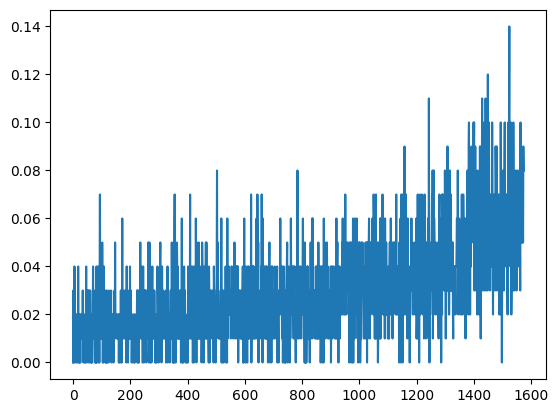

In [13]:
plt.plot(win_pct_list)
plt.show()